# 8 Steps Of Machine Learning
* Data Gathering
* Data pre-processing
* Feature Engineering
* Choosing Model
* Training Model
* Test Model/ Model Evaluation
* Parameter Tuning
* Prediction/ Deployment


In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(0)
%matplotlib inline

In [23]:
data = pd.read_csv("sample_data/FuelConsumption.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [24]:
data.drop(columns=["MODELYEAR","MAKE","MODEL","VEHICLECLASS"], inplace=True)
data.head(10)

,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [25]:
plt.scatter(data[["ENGINESIZE"]], data[["CO2EMISSIONS"]])
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

In [26]:
X = data[['ENGINESIZE', 'CYLINDERS','FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB']]
Y = data[["CO2EMISSIONS"]]
X.head(20)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB
0,2.0,4,9.9,6.7,8.5
1,2.4,4,11.2,7.7,9.6
2,1.5,4,6.0,5.8,5.9
3,3.5,6,12.7,9.1,11.1
4,3.5,6,12.1,8.7,10.6
5,3.5,6,11.9,7.7,10.0
6,3.5,6,11.8,8.1,10.1
7,3.7,6,12.8,9.0,11.1
8,3.7,6,13.4,9.5,11.6
9,2.4,4,10.6,7.5,9.2


In [27]:
# corr = data.corr()
# sns.heatmap(corr)

In [28]:
from sklearn import model_selection
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(
    X[['ENGINESIZE', 'FUELCONSUMPTION_COMB']],
    Y[["CO2EMISSIONS"]],
    test_size=0.2
)

In [29]:
from sklearn import svm

model = svm.SVR()
modelL = svm.SVR(kernel='linear')
modelP = svm.SVR(kernel='poly')

model.fit(xtrain, ytrain.values.ravel())
modelL.fit(xtrain, ytrain.values.ravel())
modelP.fit(xtrain, ytrain.values.ravel())


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [30]:
# Evaluation
from sklearn import metrics
ypred = model.predict(xtest)
ypred
print(f'MSE: {round(metrics.mean_squared_error(ytest, ypred), 2)}')
print(f'R2 Score: {round(metrics.r2_score(ytest, ypred), 2)}')

MSE: 574.41
R2 Score: 0.86


In [11]:
data[['FUELCONSUMPTION_COMB']].values.min(), data[['FUELCONSUMPTION_COMB']].values.max()

(4.7, 25.8)

In [31]:
# Regression Analyssis
line1 = np.linspace(0, 9, 853).reshape(-1, 1)
line2 = np.linspace(4, 26, 853).reshape(-1, 1)
line3 = np.linspace(1, 8.4, 853).reshape(-1, 1)
lines = pd.DataFrame(
    {
        "E": line1[:, 0],
        "C": line2[:, 0],
    }
)

fig, axes = plt.subplots(1, figsize=(20, 9))
axes.scatter(xtrain[["ENGINESIZE"]], ytrain, label="Actual Data", c="hotpink")
axes.plot(lines[["E"]].values, model.predict(lines), label="RBF Kernel Regression Line", c="darkorange")
axes.plot(lines[["E"]].values, modelL.predict(lines), label="Linear Kernel Regression Line", c="purple")
axes.plot(lines[["E"]].values, modelP.predict(lines), label="Polynomial Kernel Regression Line", c="green")
axes.legend()
axes.set_xlabel("EngineSize")
axes.set_ylabel("CO2Emission")
plt.show()


In [13]:
svm.SVR().get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [40]:
# Parameter Tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

svr = svm.SVR()
grid = RandomizedSearchCV(
    svr,
    param_distributions={
        'kernel': ['rbf', 'poly', 'linear'],
        'C': [30, 60, 90, 120, 150, 170],
        'epsilon': [ 1.5, 3.5, 4.5, 6.5, 7.5,11, 13 ,15 ],
        'degree': [3, 4, 5],
        'gamma': ['scale', 'auto']
    },
    cv=5, scoring='neg_mean_squared_error'

grid.fit(xtrain, ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d ar

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='rbf',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': [30, 60, 90, 120, 150, 170],
                                        'degree': [3, 4, 5],
                                        'epsilon': [1.5, 3.5, 4.5, 6.5, 7.5, 11,
                                                    13, 15],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['rbf', 'poly', 'linear']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='neg_mean_squared_error',
                   verbose=1)

In [41]:
grid.best_estimator_

SVR(C=90, cache_size=200, coef0=0.0, degree=5, epsilon=3.5, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

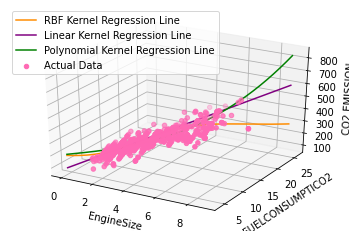

In [37]:
# Regression Analyssis
line1 = np.linspace(0, 9, 853).reshape(-1, 1)
line2 = np.linspace(4, 26, 853).reshape(-1, 1)

lines = pd.DataFrame(
    {
        "E": line1[:, 0],
        "C": line2[:, 0],
    }
)

fig = plt.figure()
axes = plt.axes(projection='3d')

axes.scatter3D(xtrain[["ENGINESIZE"]],xtrain[['FUELCONSUMPTION_COMB']], ytrain, label="Actual Data", c="hotpink")
axes.plot3D(lines[["E"]].values,lines[["C"]].values, model.predict(lines), label="RBF Kernel Regression Line", c="darkorange")
axes.plot3D(lines[["E"]].values,lines[["C"]].values, modelL.predict(lines), label="Linear Kernel Regression Line", c="purple")
axes.plot3D(lines[["E"]].values,lines[["C"]].values, modelP.predict(lines), label="Polynomial Kernel Regression Line", c="green")
axes.legend()
axes.set_xlabel("EngineSize")
axes.set_ylabel("FUELCONSUMPTICO2")
axes.set_zlabel("CO2 EMISSION")
plt.show()

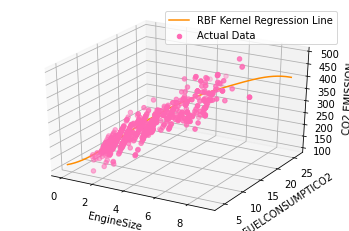

In [42]:
# Regression Analyssis
line1 = np.linspace(0, 9, 853).reshape(-1, 1)
line2 = np.linspace(4, 26, 853).reshape(-1, 1)

model = grid.best_estimator_

lines = pd.DataFrame(
    {
        "E": line1[:, 0],
        "C": line2[:, 0],
    }
)

fig = plt.figure()
axes = plt.axes(projection='3d')

axes.scatter3D(xtrain[["ENGINESIZE"]],xtrain[['FUELCONSUMPTION_COMB']], ytrain, label="Actual Data", c="hotpink")
axes.plot3D(lines[["E"]].values,lines[["C"]].values, model.predict(lines), label="RBF Kernel Regression Line", c="darkorange")
axes.legend()
axes.set_xlabel("EngineSize")
axes.set_ylabel("FUELCONSUMPTICO2")
axes.set_zlabel("CO2 EMISSION")
plt.show()